# Figure creation for ambulance trust catchment areas

In [1]:
# Import required packages
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import geopandas as gpd

# # Linting
# %load_ext pycodestyle_magic
# %pycodestyle_on

In [2]:
# Define file paths
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    image = './external_images'
    data = './data'
    look_ups = 'look_ups'
    dir_ons_geojson = './data/shapefiles/'

    lsoa11_geojson = 'LSOA_Dec_2011_Boundaries_Generalised_Clipped_BGC_EW_V3.geojson'
    ccg15_geojson = 'Clinical_Commissioning_Groups_July_2015_GCB_in_England_2022.geojson'
    ccg21_geojson = 'Clinical_Commissioning_Groups_April_2021_EN_BGC_2022.geojson'

    ambo_name_dict = 'ambulance_service_names.csv'

paths = Paths()

Setup for plots.

Colours for ambulance regions:

In [3]:
# Various seaborn colorblind colours:
c1 = '#0072B2'
c2 = '#009E73'
c3 = '#F0E442'
c4 = '#56B4E9'

# Ambulance service colours:
amb_colour = pd.Series({
    'EEAST': c1,
    'EMAS': c2,
    'IWAS': c1,
    'LAS': c4,
    'NEAS': c2,
    'NWAS': c3,
    'SCAS': c3,
    'SECAmb': c2,
    'SWAS': c2,
    'WMAS': c1,
    'YAS': c1,
    'WAST': c4,
})
amb_colour.name = 'amb_colour'

Labels for ambulance regions:

In [4]:
dict_amb_service_name = pd.read_csv(os.path.join(paths.data, paths.ambo_name_dict), index_col=0).squeeze()

dict_amb_service_name

ambulance_service
EMAS         East Midlands
EEAST      East of England
IWAS         Isle of Wight
LAS                 London
NEAS            North East
NWAS            North West
SCAS         South Central
SECAmb    South East Coast
WMAS         West Midlands
SWAS            South West
WAST                 Welsh
YAS              Yorkshire
Name: ambulance_service_name, dtype: object

Label placement and colours:

In [5]:
df_annotations = pd.DataFrame(
    [
        ['EEAST', 730000, 280000],
        ['EMAS', 620000, 390000],
        ['IWAS', 510000, 70000],
        ['LAS', 650000, 195000],
        ['NEAS', 500000, 580000],
        ['NWAS', 250000, 450000],
        ['SCAS', 380000, 50000],
        ['SECAmb', 670000, 90000],
        ['SWAS', 170000, 160000],
        ['WMAS', 170000, 270000],
        ['YAS', 570000, 490000],
        ['WAST', 200000, 300000],
    ],
    columns=['ambulance_service', 'x_label', 'y_label']
)

# Add full ambulance service name, based on the data dictionary
df_annotations['label'] = (
    df_annotations['ambulance_service'].map(dict_amb_service_name))

# Add colours
df_annotations['amb_colour'] = (
    df_annotations['ambulance_service'].map(amb_colour))

## Load data

Shape files:

In [6]:
# Import CCG 2015 boundaries:
gdf_ccg15 = gpd.read_file(os.path.join(paths.dir_ons_geojson, paths.ccg15_geojson))

gdf_ccg15.head(3)

,OBJECTID,ccg15cd,ccg15nm,GlobalID,geometry
0,1,E38000001,"NHS Airedale, Wharfedale and Craven CCG",9c545200-287f-46cb-aae9-b7dbd4864dd1,"POLYGON ((385705.500 483950.594, 386027.000 48..."
1,2,E38000002,NHS Ashford CCG,7cb0f335-98b9-4002-93ee-e16a1311439d,"POLYGON ((606227.312 156491.141, 606452.622 15..."
2,3,E38000003,NHS Aylesbury Vale CCG,92a2301c-8bc6-44a4-b09d-0995f98d4fbc,"POLYGON ((472439.907 242170.703, 472451.406 24..."


In [7]:
# Import CCG 2021 boundaries:
gdf_ccg21 = gpd.read_file(os.path.join(paths.dir_ons_geojson, paths.ccg21_geojson))

gdf_ccg21.head(3)

,OBJECTID,CCG21CD,CCG21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E38000006,NHS Barnsley CCG,429979,403330,-1.549250,53.5258,5b7e30f5-40e7-4d0c-919a-8d946b9a30fb,"POLYGON ((443219.660 409833.090, 443286.853 40..."
1,2,E38000007,NHS Basildon and Brentwood CCG,564014,194421,0.368068,51.6247,9b557a37-0357-4eed-a757-0823174dd02a,"MULTIPOLYGON (((577377.229 194031.698, 577419...."
2,3,E38000008,NHS Bassetlaw CCG,468073,384833,-0.978700,53.3560,3627680a-7aa5-47df-8ef1-c829f4b54a42,"MULTIPOLYGON (((482015.701 373909.094, 481979...."


Ambulance service catchment 2021:

In [8]:
gdf_amb = gpd.read_file('ambulance_catchment_2021.geojson')
gdf_amb = gdf_amb.set_index('ambo21')

Merge in colours for plotting:

In [10]:
gdf_amb = pd.merge(gdf_amb, amb_colour, left_on='ambo21', right_index=True, how='left')

## Hampshire and Isle of Wight

In [11]:
ccg2015nm_to_show_colours = pd.Series({
    'NHS Isle of Wight CCG': 'Moccasin',
    'NHS West Hampshire CCG': '#0072B2',
    'NHS Southampton CCG': '#D55E00',
    'NHS Fareham and Gosport CCG': '#56B4E9',
    'NHS Portsmouth CCG': '#009E73',
    'NHS South Eastern Hampshire CCG': '#CC79A7',
    'NHS North Hampshire CCG': '#F0E442',
})
ccg2015nm_to_show_colours.name = 'colour'

ccg2021nm_to_show_colours = pd.Series({
    'NHS Hampshire, Southampton and Isle of Wight CCG': '#0072B2',
    'NHS Portsmouth CCG': '#009E73',
})
ccg2021nm_to_show_colours.name = 'colour'

gdf_ccg15_hants = pd.merge(gdf_ccg15, ccg2015nm_to_show_colours, left_on='ccg15nm', right_index=True, how='right')
gdf_ccg21_hants = pd.merge(gdf_ccg21, ccg2021nm_to_show_colours, left_on='CCG21NM', right_index=True, how='right')

In [12]:
df_annotations_hants = pd.DataFrame(
    [
        ['NHS Isle of Wight CCG', 450000, 67000],
        ['NHS West Hampshire CCG', 400000, 140000],
        ['NHS Southampton CCG', 400000, 130000],
        ['NHS Fareham and Gosport CCG', 500000, 90000],
        ['NHS Portsmouth CCG', 500000, 100000],
        ['NHS South Eastern Hampshire CCG', 500000, 115000],
        ['NHS North Hampshire CCG', 460000, 175000],
    ],
    columns=['ccg15nm', 'x_label', 'y_label']
)

# Add colours
df_annotations_hants['colour'] = (
    df_annotations_hants['ccg15nm'].map(ccg2015nm_to_show_colours))

In [13]:
df_annotations_hants_21 = pd.DataFrame(
    [
        ['NHS Hampshire, Southampton and Isle of Wight CCG', 460000, 175000],
        ['NHS Portsmouth CCG', 500000, 100000],
    ],
    columns=['CCG21NM', 'x_label', 'y_label']
)

# Add colours
df_annotations_hants_21['colour'] = (
    df_annotations_hants_21['CCG21NM'].map(ccg2021nm_to_show_colours))

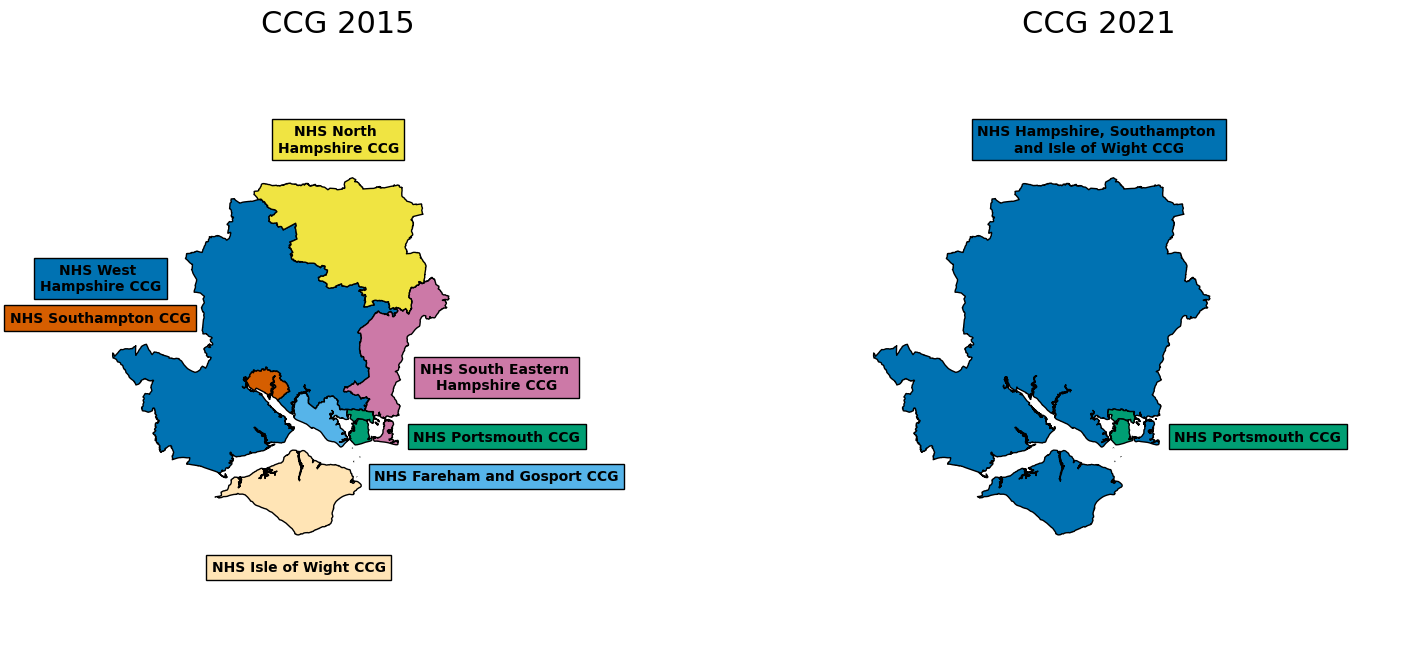

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

gdf_ccg15_hants.plot(
    ax=axs[0],
    color=gdf_ccg15_hants['colour'],
    edgecolor='k'
)
gdf_ccg21_hants.plot(
    ax=axs[1],
    color=gdf_ccg21_hants['colour'],
    edgecolor='k'
)

axs[0].set_title('CCG 2015', size=22)
axs[1].set_title('CCG 2021', size=22)

for i in range(len(df_annotations_hants)):
    axs[0].annotate(
        df_annotations_hants.loc[i, 'ccg15nm'].replace('Ham', '\nHam'),
        xy=(df_annotations_hants.loc[i, 'x_label'], df_annotations_hants.loc[i, 'y_label']),
        weight='bold',
        bbox=dict(facecolor=df_annotations_hants.loc[i, 'colour']),
        ha='center', va='center'
    )
for i in range(len(df_annotations_hants_21)):
    axs[1].annotate(
        df_annotations_hants_21.loc[i, 'CCG21NM'].replace('and', '\nand'),
        xy=(df_annotations_hants_21.loc[i, 'x_label'], df_annotations_hants_21.loc[i, 'y_label']),
        weight='bold',
        bbox=dict(facecolor=df_annotations_hants_21.loc[i, 'colour']),
        ha='center', va='center'
    )

for ax in axs:
    ax.set_xlim(380000, 540000)
    ax.set_ylim(50000, 200000)
    ax.axis('off')

plt.savefig('figures/hants_ccg.png', bbox_inches='tight')
plt.show()

## Milton Keynes location with Buckinghamshire and Bedfordshire

In [15]:
ccg2021nm_to_show_colours = pd.Series({
    'NHS Bedfordshire, Luton and Milton Keynes CCG': 'SkyBlue',
    'NHS Buckinghamshire CCG': 'PaleGoldenrod',
})
ccg2021nm_to_show_colours.name = 'colour'

gdf_ccg21_berks_beds = pd.merge(gdf_ccg21, ccg2021nm_to_show_colours, left_on='CCG21NM', right_index=True, how='right')

In [16]:
gdf_ccg21_berks_beds

,OBJECTID,CCG21CD,CCG21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,colour
97,98,E38000249,"NHS Bedfordshire, Luton and Milton Keynes CCG",501732,241559,-0.51742,52.0631,cd6373d6-93a9-49ed-a9e0-897544a09828,"POLYGON ((526365.626 244062.281, 526148.813 24...",SkyBlue
72,73,E38000223,NHS Buckinghamshire CCG,482506,205421,-0.80644,51.7414,d5c62ba4-38e7-438f-8b1c-6859e9e8da16,"POLYGON ((477511.289 238583.187, 477635.698 23...",PaleGoldenrod


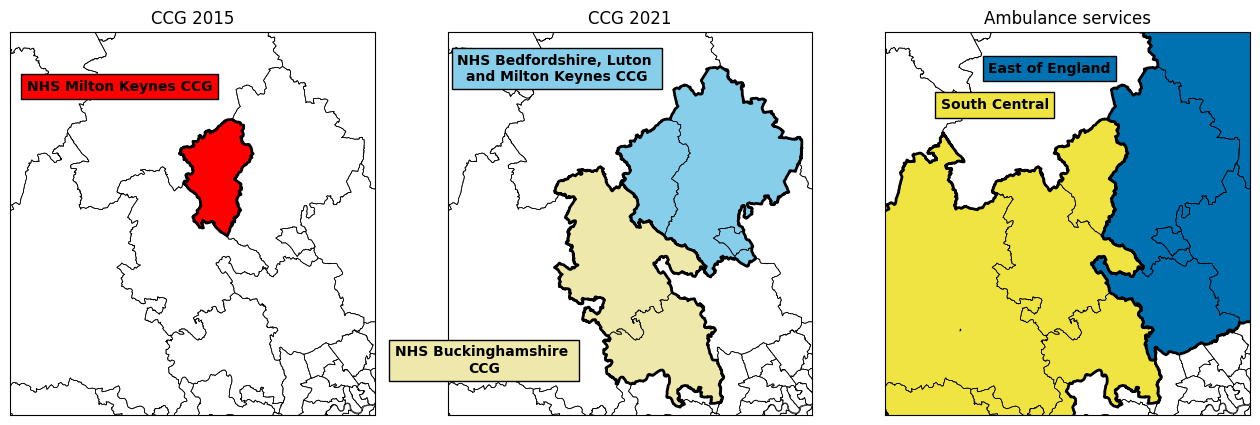

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(16, 16))

gdf_ccg15.plot(
    ax=axs[0],
    color='none',  # gdf_ccg15_berks_beds['colour'],
    edgecolor='k',
    linewidth=0.5,
)
# Highlight Milton Keynes:
mask = gdf_ccg15['ccg15nm'].str.contains('Keynes')
gdf_ccg15.loc[mask].plot(
    ax=axs[0],
    color='r',  # gdf_ccg15_berks_beds['colour'],
    edgecolor='k',
    linewidth=2,
)
axs[0].annotate(
    gdf_ccg15.loc[mask, 'ccg15nm'].values[0],
    xy=(460000, 265000),
    weight='bold',
    bbox=dict(facecolor='r'),
    ha='center', va='center'
)

gdf_ccg21_berks_beds.plot(
    ax=axs[1],
    color=gdf_ccg21_berks_beds['colour'],
    # color='none',
    edgecolor='k',
    linewidth=2,
)
gdf_ccg15.plot(
    ax=axs[1],
    color='none',  # gdf_ccg15_berks_beds['colour'],
    edgecolor='k',
    linewidth=0.5,
)
# Annotate CCG 2021 labels:
i = gdf_ccg21_berks_beds['CCG21NM'] == 'NHS Bedfordshire, Luton and Milton Keynes CCG'
axs[1].annotate(
        gdf_ccg21_berks_beds.loc[i, 'CCG21NM'].values[0].replace('and', '\nand'),
        xy=(460000, 270000),
        weight='bold',
        bbox=dict(facecolor=gdf_ccg21_berks_beds.loc[i, 'colour'].values[0]),
        ha='center', va='center'
    )
i = gdf_ccg21_berks_beds['CCG21NM'] == 'NHS Buckinghamshire CCG'
axs[1].annotate(
        gdf_ccg21_berks_beds.loc[i, 'CCG21NM'].values[0].replace('CCG', '\nCCG'),
        xy=(440000, 190000),
        weight='bold',
        bbox=dict(facecolor=gdf_ccg21_berks_beds.loc[i, 'colour'].values[0]),
        ha='center', va='center'
    )

mask_amb = gdf_amb.index.isin(['SCAS', 'EEAST'])
gdf_amb.loc[mask_amb].plot(
    ax=axs[2],
    color=gdf_amb.loc[mask_amb]['amb_colour'],
    # color='none',
    edgecolor='k',
    linewidth=2,
)
gdf_ccg15.plot(
    ax=axs[2],
    color='none',  # gdf_ccg15_berks_beds['colour'],
    edgecolor='k',
    linewidth=0.5,
)
# Annotate ambo service labels:
i = df_annotations['ambulance_service'] == 'EEAST'
axs[2].annotate(
        df_annotations.loc[i, 'label'].values[0],
        xy=(475000, 270000),
        weight='bold',
        bbox=dict(facecolor=df_annotations.loc[i, 'amb_colour'].values[0]),
        ha='center', va='center'
    )
i = df_annotations['ambulance_service'] == 'SCAS'
axs[2].annotate(
        df_annotations.loc[i, 'label'].values[0],
        xy=(460000, 260000),
        weight='bold',
        bbox=dict(facecolor=df_annotations.loc[i, 'amb_colour'].values[0]),
        ha='center', va='center'
    )

for ax in axs:
    ax.set_xlim(430000, 530000)
    ax.set_ylim(175000, 280000)

axs[0].set_title('CCG 2015')
axs[1].set_title('CCG 2021')
axs[2].set_title('Ambulance services')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig('figures/ambo_milton_keynes.png', bbox_inches='tight')
plt.show()

## Combine SCAS and EEAST maps

n.b. there is a newer green SCAS map. It has the same areas except that Surrey is missing. All areas are the same colour so it is less clear that Sussex is just for patient transport rather than emergency coverage.

CCG 2021 setup:

In [18]:
ambo_ref_maps_colours_ccg21 = pd.Series({
    'NHS Buckinghamshire CCG': '#fecd04',
    'NHS Oxfordshire CCG': '#fecd04',
    'NHS Berkshire West CCG': '#fecd04',
    'NHS Hampshire, Southampton and Isle of Wight CCG': '#fecd04',
    'NHS Portsmouth CCG': '#99bb4f',
    'NHS Frimley CCG': '#949599',
    'NHS Surrey Heartlands CCG': '#949599',
    'NHS West Sussex CCG': '#a8a9ad',
    'NHS East Sussex CCG': '#bdbec0',
    'NHS Brighton and Hove CCG': '#818286',
    'NHS Norfolk and Waveney CCG': '#a8c599',
    'NHS Cambridgeshire and Peterborough CCG': '#dde8d7',
    'NHS Ipswich and East Suffolk CCG': '#f3e137',
    'NHS West Suffolk CCG': '#f3e137',
    'NHS Bedfordshire, Luton and Milton Keynes CCG': '#a8c599',
    'NHS East and North Hertfordshire CCG': '#f3e137',
    'NHS Herts Valleys CCG': '#f3e137',
    'NHS West Essex CCG': '#a8c599',
    'NHS Mid Essex CCG': '#a8c599',
    'NHS North East Essex CCG': '#a8c599',
    'NHS Castle Point and Rochford CCG': '#a8c599',
    'NHS Basildon and Brentwood CCG': '#a8c599',
    'NHS Thurrock CCG': '#a8c599',
    'NHS Southend CCG': '#a8c599'
})
ambo_ref_maps_colours_ccg21.name = 'colour'

In [19]:
gdf_ccg21_ref = pd.merge(gdf_ccg21, ambo_ref_maps_colours_ccg21, left_on='CCG21NM', right_index=True, how='right')

CCG 2015 setup:

In [20]:
ambo_ref_maps_colours_ccg15 = pd.Series({
    # SCAS Yellow:
    'NHS Aylesbury Vale CCG': '#fecd04',
    'NHS Chiltern CCG': '#fecd04',
    'NHS Fareham and Gosport CCG': '#fecd04',
    'NHS Milton Keynes CCG': '#fecd04',
    'NHS Newbury and District CCG': '#fecd04',
    'NHS North & West Reading CCG': '#fecd04',
    'NHS North Hampshire CCG': '#fecd04',
    'NHS Oxfordshire CCG': '#fecd04',
    'NHS Portsmouth CCG': '#99bb4f',
    'NHS South Eastern Hampshire CCG': '#fecd04',
    'NHS South Reading CCG': '#fecd04',
    'NHS Southampton CCG': '#fecd04',
    'NHS West Hampshire CCG': '#fecd04',
    'NHS Wokingham CCG': '#fecd04',
    # SCAS Grey:
    'NHS North East Hampshire and Farnham CCG': '#949599',
    'NHS Bracknell and Ascot CCG': '#949599',
    'NHS Brighton and Hove CCG': '#818286',
    'NHS Crawley CCG': '#a8a9ad',
    'NHS East Surrey CCG': '#949599',
    'NHS Eastbourne, Hailsham and Seaford CCG': '#bdbec0',
    'NHS Hastings and Rother CCG': '#bdbec0',
    'NHS High Weald Lewes Havens CCG': '#bdbec0',
    'NHS Horsham and Mid Sussex CCG': '#a8a9ad',
    'NHS North West Surrey CCG': '#949599',
    'NHS Slough CCG': '#949599',
    'NHS Surrey Downs CCG': '#949599',
    'NHS Surrey Heath CCG': '#949599',
    'NHS Windsor, Ascot and Maidenhead CCG': '#949599',
    'NHS Coastal West Sussex CCG': '#a8a9ad',
    'NHS Guildford and Waverley CCG': '#949599',
    # EEAST:
    'NHS Basildon and Brentwood CCG': '#a8c599',
    'NHS Bedfordshire CCG': '#a8c599',
    'NHS Cambridgeshire and Peterborough CCG': '#dde8d7',
    'NHS Castle Point and Rochford CCG': '#a8c599',
    'NHS East and North Hertfordshire CCG': '#f3e137',
    'NHS Great Yarmouth and Waveney CCG': '#a8c599',
    'NHS Herts Valleys CCG': '#f3e137',
    'NHS Ipswich and East Suffolk CCG': '#f3e137',
    'NHS Luton CCG': '#a8c599',
    'NHS Mid Essex CCG': '#a8c599',
    'NHS North East Essex CCG': '#a8c599',
    'NHS North Norfolk CCG': '#a8c599',
    'NHS Norwich CCG': '#a8c599',
    'NHS South Norfolk CCG': '#a8c599',
    'NHS Southend CCG': '#a8c599',
    'NHS Thurrock CCG': '#a8c599',
    'NHS West Essex CCG': '#a8c599',
    'NHS West Norfolk CCG': '#a8c599',
    'NHS West Suffolk CCG': '#f3e137',
})
ambo_ref_maps_colours_ccg15.name = 'colour'

In [21]:
gdf_ccg15_ref = pd.merge(gdf_ccg15, ambo_ref_maps_colours_ccg15, left_on='ccg15nm', right_index=True, how='right')

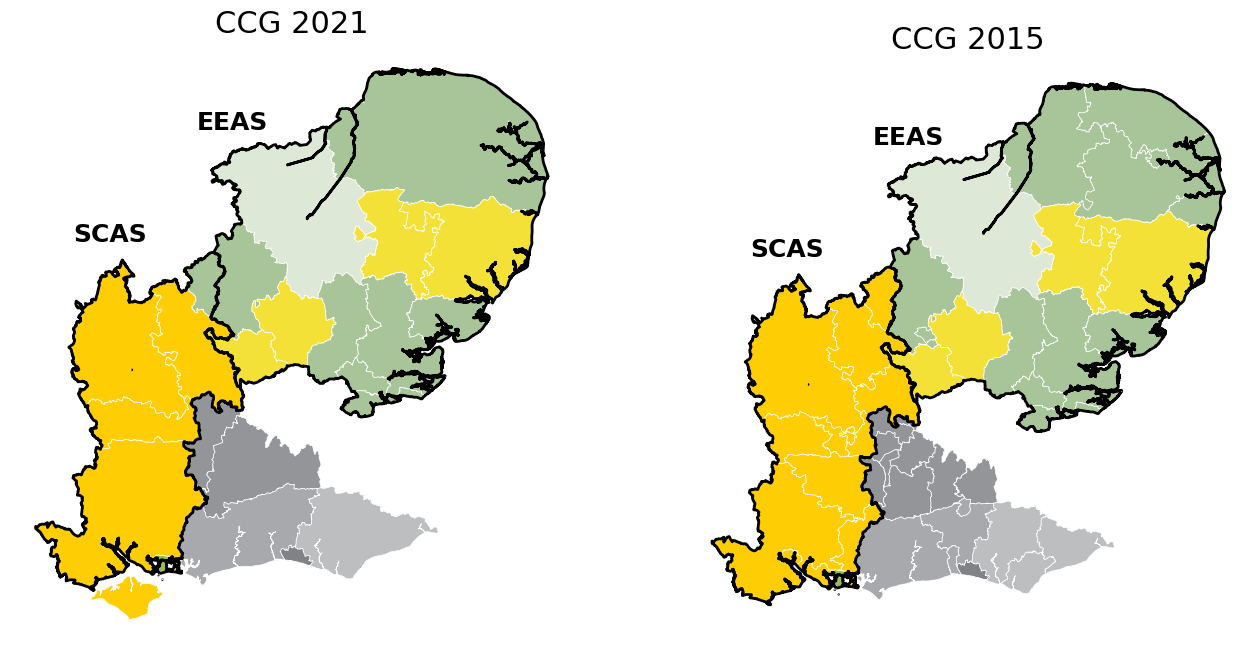

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

gdf_ccg21_ref.plot(
    ax=axs[0],
    color=gdf_ccg21_ref['colour'],
    edgecolor='w',
    linewidth=0.5,
)

gdf_ccg15_ref.plot(
    ax=axs[1],
    color=gdf_ccg15_ref['colour'],
    edgecolor='w',
    linewidth=0.5,
)

for ax in axs:
    mask = gdf_amb.index.isin(['EEAST', 'SCAS'])
    gdf_amb.loc[mask].plot(
        ax=ax,
        color='none',
        edgecolor='k',
        linewidth=2
    )
    
    ax.annotate('EEAS', xy=(500000, 320000), weight='bold', ha='center', va='center', size=18)
    ax.annotate('SCAS', xy=(440000, 265000), weight='bold', ha='center', va='center', size=18)
    
    ax.axis('off')

axs[0].set_title('CCG 2021', size=22)
axs[1].set_title('CCG 2015', size=22)

plt.savefig('figures/ambo_scas_eeast_ccg21_ccg15.png', bbox_inches='tight')
plt.show()